In [1]:
import up42
up42.authenticate(project_id="b2ee0f3d-60ae-4d6e-859e-a1f705d3f3b4", project_api_key="NacRYkHJ.gd4pnDdrZD6XQgKYiX6T4CKCYCu8WC2ucIB") # inline authentication (also possible with json file)
project = up42.initialize_project()

2022-05-11 15:42:46,635 - Authentication with UP42 successful!
2022-05-11 15:42:50,492 - Initialized Project(name: Forestfire, project_id: b2ee0f3d-60ae-4d6e-859e-a1f705d3f3b4, description: , createdAt: 2022-05-11T19:30:23.588443Z)


In [2]:
# Construct workflow
workflow = project.create_workflow(name="30-seconds-workflow", use_existing=True)
input_tasks = ["Sentinel-2 L2A Visual (GeoTIFF)",
               "Sharpening Filter"]
workflow.add_workflow_tasks(input_tasks)

2022-05-11 15:43:02,813 - Getting existing workflows in project ...
2022-05-11 15:43:05,003 - Got 1 workflows for project b2ee0f3d-60ae-4d6e-859e-a1f705d3f3b4.
2022-05-11 15:43:05,479 - Created new workflow: f0123547-eb32-4968-8ac4-76896dba0dd3
2022-05-11 15:43:13,766 - Added tasks to workflow: [{'name': 'esa-s2-l2a-gtiff-visual:1', 'parentName': None, 'blockId': 'c4cb8913-2ef3-4e82-a426-65ea8faacd9a'}, {'name': 'sharpening:1', 'parentName': 'esa-s2-l2a-gtiff-visual:1', 'blockId': 'e374ea64-dc3b-4500-bb4b-974260fb203e'}]


In [3]:
# Define the aoi and input parameters of the workflow to run it.
aoi = up42.get_example_aoi(as_dataframe=True)
# Or use up42.draw_aoi(), up42.read_vector_file(), FeatureCollection, GeoDataFrame etc.
input_parameters = workflow.construct_parameters(geometry=aoi, 
                                                 geometry_operation="bbox", 
                                                 start_date="2018-01-01",
                                                 end_date="2020-12-31",
                                                 limit=1)
input_parameters["esa-s2-l2a-gtiff-visual:1"].update({"max_cloud_cover":5})

2022-05-11 15:43:32,119 - Getting small example aoi in location 'Berlin'.


In [4]:
# Price estimation
workflow.estimate_job(input_parameters)

2022-05-11 15:43:50,503 - Estimated: 2-2 Credits, Duration: 5-5 min.


{'esa-s2-l2a-gtiff-visual:1': {'blockConsumption': {'resources': {'unit': 'SQUARE_KM',
    'min': 0.027816,
    'max': 0.027816},
   'credit': {'min': 0, 'max': 0}},
  'machineConsumption': {'duration': {'min': 0, 'max': 0},
   'credit': {'min': 1, 'max': 1}}},
 'sharpening:1': {'blockConsumption': {'resources': {'unit': 'SQUARE_KM',
    'min': 0.027816,
    'max': 0.027816},
   'credit': {'min': 0, 'max': 0}},
  'machineConsumption': {'duration': {'min': 308, 'max': 349},
   'credit': {'min': 1, 'max': 1}}}}

In [5]:
# Run a test job to query data availability and check the configuration.
test_job = workflow.test_job(input_parameters, track_status=True)

2022-05-11 15:44:01,959 - +++++++++++++++++++++++++++++++++
2022-05-11 15:44:01,960 - Running this job as Test Query...
2022-05-11 15:44:01,961 - +++++++++++++++++++++++++++++++++
2022-05-11 15:44:01,962 - Selected input_parameters: {'esa-s2-l2a-gtiff-visual:1': {'time': '2018-01-01T00:00:00Z/2020-12-31T23:59:59Z', 'limit': 1, 'max_cloud_cover': 5, 'bbox': [13.375966, 52.515068, 13.378314, 52.516639]}, 'sharpening:1': {'strength': 'medium'}, 'config': {'mode': 'DRY_RUN'}}
2022-05-11 15:44:02,998 - Created and running new job: 2467d64c-7ad6-41c5-a7b8-a5ab16ebeeae.
2022-05-11 15:44:03,423 - Tracking job status continuously, reporting every 30 seconds...
2022-05-11 15:44:36,099 - Job is RUNNING! - 2467d64c-7ad6-41c5-a7b8-a5ab16ebeeae
2022-05-11 15:45:08,808 - Job finished successfully! - 2467d64c-7ad6-41c5-a7b8-a5ab16ebeeae


2022-05-11 15:45:15,582 - Selected input_parameters: {'esa-s2-l2a-gtiff-visual:1': {'time': '2018-01-01T00:00:00Z/2020-12-31T23:59:59Z', 'limit': 1, 'max_cloud_cover': 5, 'bbox': [13.375966, 52.515068, 13.378314, 52.516639]}, 'sharpening:1': {'strength': 'medium'}}
2022-05-11 15:45:21,385 - Created and running new job: 1c643a91-255c-43fd-9bac-3f2d20c817d0.
2022-05-11 15:45:21,872 - Tracking job status continuously, reporting every 30 seconds...
2022-05-11 15:45:54,296 - Job is RUNNING! - 1c643a91-255c-43fd-9bac-3f2d20c817d0
2022-05-11 15:46:26,226 - Job is RUNNING! - 1c643a91-255c-43fd-9bac-3f2d20c817d0
2022-05-11 15:47:01,813 - Job is RUNNING! - 1c643a91-255c-43fd-9bac-3f2d20c817d0
2022-05-11 15:47:07,587 - Job finished successfully! - 1c643a91-255c-43fd-9bac-3f2d20c817d0
2022-05-11 15:47:12,594 - Downloading results of job 1c643a91-255c-43fd-9bac-3f2d20c817d0
2022-05-11 15:47:12,596 - Download directory: C:\Users\DEEP\python_codes\Untitled Folder\project_b2ee0f3d-60ae-4d6e-859e-a1f70

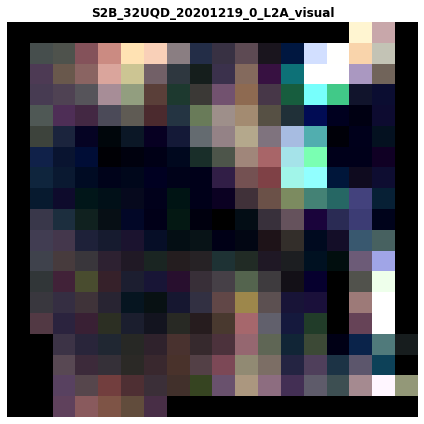

In [6]:
# Run the actual job.
job = workflow.run_job(input_parameters, track_status=True)

job.download_results()
job.plot_results(figsize=(6,6))